In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
from random import sample
import math
import matplotlib.pyplot as plt

list_tickers = ['^GSPC']

data = yf.download(list_tickers, start="2000-01-02", end="2020-12-31")['Adj Close']
data.dropna(inplace = True)
data

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
2000-01-07    1441.469971
                 ...     
2020-12-23    3690.010010
2020-12-24    3703.060059
2020-12-28    3735.360107
2020-12-29    3727.040039
2020-12-30    3732.040039
Name: Adj Close, Length: 5283, dtype: float64

Text(0.5, 1.0, 'S&P 500 variations')

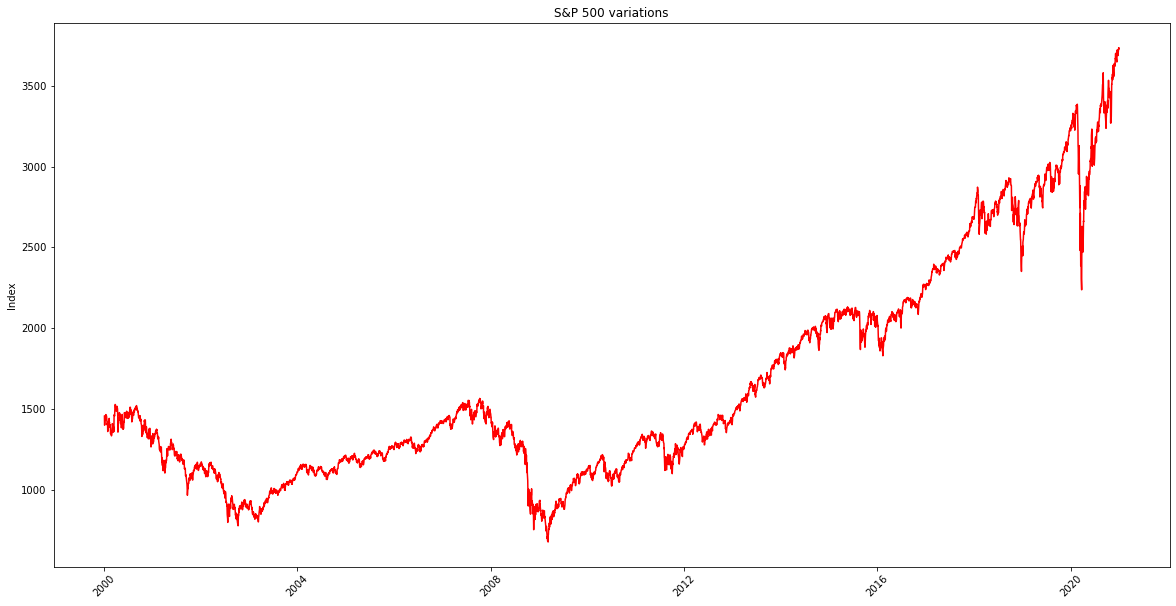

In [2]:
plt.figure(figsize=(20,10))
plt.plot(data, color='red')
plt.xticks(rotation = 45)
plt.ylabel('Index')
plt.title('S&P 500 variations')

In [19]:
data.shape #total number of trade days 

(5283,)

In [20]:
move=[0,0,0] #[up, flat, down]
def var(ticker):
    for i in range(len(ticker)-1):
        if ticker[i]>ticker[i-1]:
            move[0]+=1
        elif ticker[i]==ticker[i-1]:
            move[1]+=1
            print(i)
        else:
            move[2]+=1
    print("L'indice a monté (en % des journées) : {}".format((move[0]/sum(move))*100.00))
    print("L'indice n'a pas bougé (en % des journées): {}".format((move[1]/sum(move))*100.00))
    print("L'indice a baissé (en % des journées): {}".format((move[2]/sum(move))*100.00))
        
var(data)

print(move)

758
2011
4282
L'indice a monté (en % des journées) : 53.69178341537296
L'indice n'a pas bougé (en % des journées): 0.05679666792881485
L'indice a baissé (en % des journées): 46.251419916698225
[2836, 3, 2443]


In [21]:
move

[2836, 3, 2443]

Text(0.5, 0, 'Outcomes')

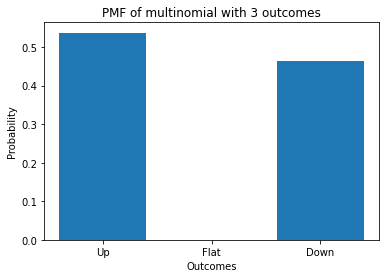

In [22]:
occurence = [move[0]/sum(move), move[1]/sum(move), move[2]/sum(move)]
plt.bar(['Up', 'Flat', 'Down'], occurence)
plt.title('PMF of multinomial with 3 outcomes')
plt.ylabel('Probability')
plt.xlabel('Outcomes')

In [23]:
Outcomes = ['Up', 'Flat', 'Down']
# Observations
c = np.array(occurence)
#Pseudocounts
alphas = np.array([1, 1, 1])
expected = (alphas + c) / (c.sum() + alphas.sum())
print("Prevalence de Up: {}".format(expected[0]*100.00))
print("Prevalence de Flat: {}".format(expected[1]*100.00))
print("Prevalence de Down: {}".format(expected[2]*100.00))

Prevalence de Up: 38.42294585384324
Prevalence de Flat: 25.014199166982205
Prevalence de Down: 36.56285497917455


In [24]:
test_alpha = np.array([[0.1, 0.1, 0.1], [1, 1, 1], [5, 5, 5], [15, 15, 15]])
c = np.array(occurence)
res = []
for i in range(len(test_alpha)):
    alphas = test_alpha[i]   
    res.append((alphas + c) / (c.sum() + alphas.sum()))

res2 = np.round(res, decimals=3)*100 #increasing sum(alpha) disminish the weight of historical data
df = pd.DataFrame(res2, columns=["Up","Flat","Down"], index=['[0.1, 0.1, 0.1]','[1, 1, 1]','[5, 5, 5]', '[15, 15, 15]'])
df

,Up,Flat,Down
"[0.1, 0.1, 0.1]",49.0,7.7,43.3
"[1, 1, 1]",38.4,25.0,36.6
"[5, 5, 5]",34.6,31.3,34.1
"[15, 15, 15]",33.8,32.6,33.6


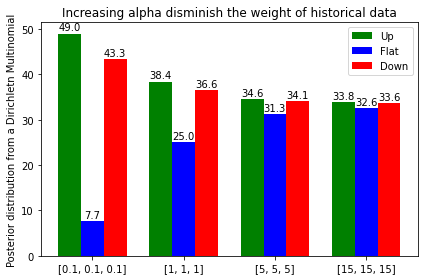

In [25]:
labels = ['[0.1, 0.1, 0.1]','[1, 1, 1]','[5, 5, 5]', '[15, 15, 15]']
Up = [49 , 38.4, 34.6, 33.8]
Flat=[7.7, 25.0, 31.3, 32.6] 
Down=[43.3, 36.6, 34.1, 33.6]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width), Up, width, label='Up', color="Green")
rects2 = ax.bar(x, Flat, width, label='Flat', color="Blue")
rects3 = ax.bar(x + (width), Down, width, label='Down', color="Red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posterior distribution from a Dirichletn Multinomial')
ax.set_title('Increasing alpha disminish the weight of historical data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show() 
#modifying sum(alpha) has a huge effects on the informativeness of the data we have access to.
#Modifying alpha is also a great advantage to add inforamtion from an expert for example in case of a
#Bull market (going Up) or Bear market (going Down). For the former case, increase weight of the fist alpha and in the latter,
#increase weight on the last alpha will increase respectively their probability of happening

In [26]:
occurence

[0.5369178341537296, 0.0005679666792881485, 0.4625141991669822]

In [27]:
sum([0.5369, 0.0006, 0.4625])

1.0

In [42]:
import pymc3 as pm

alphas = np.array([0.15,0.15,0.15])
c = np.array([2836, 3, 2443])  #problem with probability vector : to check by replacing with np.array(occurence). 
#If not np.array([6,0,4]) works

# Create model
with pm.Model() as model:
    # Parameters of the Multinomial are from a Dirichlet
    parameters = pm.Dirichlet('parameters', a=alphas, shape=3)
    print(parameters)
    # Observed data is from a Multinomial distribution
    observed_data = pm.Multinomial(
        'observed_data', n=5282, p=parameters, shape=3, observed=c)     #if np.array(occurence), change n ?
    print(observed_data)
    # Sample from the posterior
    trace = pm.sample(draws=5000, chains=2, tune=2500, 
                      discard_tuned_samples=True)

parameters ~ Dirichlet
observed_data ~ Multinomial


C:\Users\Nathan\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [parameters]


Sampling 2 chains for 2_500 tune and 5_000 draw iterations (5_000 + 10_000 draws total) took 612 seconds.
There were 165 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.43193100191279044, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [41]:
pm.traceplot

<function arviz.plots.traceplot.plot_trace(data: arviz.data.inference_data.InferenceData, var_names: Union[List[str], NoneType] = None, filter_vars: Union[str, NoneType] = None, transform: Union[Callable, NoneType] = None, coords: Union[Dict[str, List[Any]], NoneType] = None, divergences: Union[str, NoneType] = 'auto', kind: Union[str, NoneType] = 'trace', figsize: Union[Tuple[float, float], NoneType] = None, rug: bool = False, lines: Union[List[Tuple[str, Dict[str, List[Any]], Any]], NoneType] = None, circ_var_names: Union[List[str], NoneType] = None, circ_var_units: bool = 'radians', compact: bool = False, compact_prop: Union[str, Mapping[str, Any], NoneType] = None, combined: bool = False, chain_prop: Union[str, Mapping[str, Any], NoneType] = None, legend: bool = False, plot_kwargs: Union[Dict[str, Any], NoneType] = None, fill_kwargs: Union[Dict[str, Any], NoneType] = None, rug_kwargs: Union[Dict[str, Any], NoneType] = None, hist_kwargs: Union[Dict[str, Any], NoneType] = None, trace

In [ ]:
pm.traceplot
az.plot_trace(idata, kind="rank_vlines")

We notice that we have 3 days where the S&N500 value closed at the EXACT same valuation than the day before. As we want to end with just 2 outcomes (Up & Down), we will convert these 3 flat days into one of these 2 options. 
We estimate that respecting trends is a way that makes sense. For example for a given flat day, is the previous day was Up then we consider this flat day as Up as well. On the opposite, if the previous day was Down then the Flat day will be considered as Down as well.

In [43]:
move=[0,0] #[up, flat, down]
def var(ticker):
    for i in range(len(ticker)-1):
        if ticker[i]>ticker[i-1]:
            move[0]+=1
        elif ticker[i]==ticker[i-1]:
            if ticker[i-1]>ticker[i-2]:
                move[0]+=1
            if ticker[i-1]<ticker[i-2]:
                move[1]+=1
        else:
            move[1]+=1
    print("L'indice a monté (en % des journées) : {}".format((move[0]/sum(move))*100.00))
    print("L'indice a baissé (en % des journées): {}".format((move[1]/sum(move))*100.00))
#     print("L'indice n'a pas bougé (en % des journées): {}".format((move[1]/sum(move))*100.00))
    
        
var(data)

print(move)

L'indice a monté (en % des journées) : 53.710715638015905
L'indice a baissé (en % des journées): 46.289284361984095
[2837, 2445]


Text(0.5, 0, 'Outcomes')

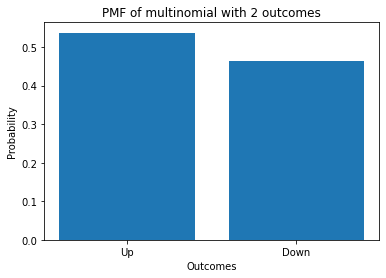

In [44]:
occurence = [move[0]/sum(move), move[1]/sum(move)]
plt.bar(['Up', 'Down'], occurence)
plt.title('PMF of multinomial with 2 outcomes')
plt.ylabel('Probability')
plt.xlabel('Outcomes')

In [45]:
Outcomes = ['Up', 'Down']
# Observations
c = np.array(occurence)
#Pseudocounts
alphas = np.array([1, 1])
expected = (alphas + c) / (c.sum() + alphas.sum())
print("Prevalence de Up: {}".format(expected[0]*100.00))
print("Prevalence de Down: {}".format(expected[1]*100.00))

Prevalence de Up: 51.23690521267197
Prevalence de Down: 48.76309478732803


In [46]:
test_alpha = np.array([[0.1, 0.1], [1, 1], [5, 5], [15, 15]])
c = np.array(occurence)
res = []
for i in range(len(test_alpha)):
    alphas = test_alpha[i]   
    res.append((alphas + c) / (c.sum() + alphas.sum()))

res2 = np.round(res, decimals=3)*100 #increasing sum(alpha) disminish the weight of historical data
df = pd.DataFrame(res2, columns=["Up","Down"], index=['[0.1, 0.1]','[1, 1]','[5, 5]', '[15, 15]'])
df

,Up,Down
"[0.1, 0.1]",53.1,46.9
"[1, 1]",51.2,48.8
"[5, 5]",50.3,49.7
"[15, 15]",50.1,49.9


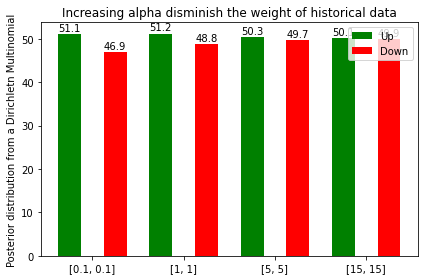

In [47]:
labels = ['[0.1, 0.1]','[1, 1]','[5, 5]','[15, 15]']
Up = [51.1,51.2,50.3,50.1]
Down=[46.9,48.8,49.7,49.9]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width), Up, width, label='Up', color="Green")
rects2 = ax.bar(x + (width), Down, width, label='Down', color="Red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posterior distribution from a Dirichletn Multinomial')
ax.set_title('Increasing alpha disminish the weight of historical data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show() 
#modifying sum(alpha) has a huge effects on the informativeness of the data we have access to.
#Modifying alpha is also a great advantage to add inforamtion from an expert for example in case of a
#Bull market (going Up) or Bear market (going Down). For the former case, increase weight of the fist alpha and in the latter,
#increase weight on the last alpha will increase respectively their probability of happening

In [48]:
print(occurence)
print(move)

[0.537107156380159, 0.46289284361984095]
[2837, 2445]


In [49]:
import pymc3 as pm

alphas = np.array([0.15, 0.15])
c = np.array([2837, 2445])  #problem with probability vector : to check by replacing with np.array(occurence). 
#If not np.array([6,0,4]) works

# Create model
with pm.Model() as model:
    # Parameters of the Multinomial are from a Dirichlet
    parameters = pm.Dirichlet('parameters', a=alphas, shape=2)
    # Observed data is from a Multinomial distribution
    observed_data = pm.Multinomial(
        'observed_data', n=sum(c), p=parameters, shape=2, observed=c)     #if np.array(occurence), change n ?
    
    trace = pm.sample(draws=1000, chains=2, tune=500, 
                      discard_tuned_samples=True)

C:\Users\Nathan\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [parameters]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 21 seconds.
